In [68]:
import copy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
def get_ids():
    target_ids = pd.read_csv('data/SampleSubmissionStage1.csv').set_index('ID').drop('Pred', axis=1)
    target_ids['Season'] = target_ids.index.map(lambda i: i.split('_')[0])
    target_ids['team_a'] = target_ids.index.map(lambda i: i.split('_')[1])
    target_ids['team_b'] = target_ids.index.map(lambda i: i.split('_')[2])
    target_ids['in_target'] = True
    ncaa_games = pd.read_csv('data/NCAATourneyCompactResults.csv')
    train_ids = pd.DataFrame(ncaa_games.Season.map(str) + '_'
                            + ncaa_games.WTeamID.map(str) + '_'
                            + ncaa_games.LTeamID.map(str))\
        .rename(columns={0: 'ID'}).set_index('ID')
    train_ids['Season'] = train_ids.index.map(lambda i: i.split('_')[0])
    train_ids['team_a'] = train_ids.index.map(lambda i: i.split('_')[1])
    train_ids['team_b'] = train_ids.index.map(lambda i: i.split('_')[2])
    return train_ids, target_ids

train, target = get_ids()
train.sample()

,Season,team_a,team_b
ID,,,
1992_1281_1452,1992,1281,1452


In [54]:
train

,Season,team_a,team_b
ID,,,
1985_1116_1234,1985,1116,1234
1985_1120_1345,1985,1120,1345
1985_1207_1250,1985,1207,1250
1985_1229_1425,1985,1229,1425
1985_1242_1325,1985,1242,1325
1985_1246_1449,1985,1246,1449
1985_1256_1338,1985,1256,1338
1985_1260_1233,1985,1260,1233
1985_1314_1292,1985,1314,1292


In [10]:
get_ids()[0].head()

,Season,team_a,team_b
ID,,,
1985_1116_1234,1985,1116,1234
1985_1120_1345,1985,1120,1345
1985_1207_1250,1985,1207,1250
1985_1229_1425,1985,1229,1425
1985_1242_1325,1985,1242,1325


In [28]:
ncaa_games = pd.read_csv('data/NCAATourneyCompactResults.csv')
print ncaa_games.shape
ncaa_games.head()

(2117, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [12]:
ncaa_games = pd.read_csv('data/NCAATourneyCompactResults.csv')
ncaa_games = ncaa_games.astype({
    'LTeamID': str,
    'WTeamID': str,
    'Season': str
})
ncaa_games['diff'] = ncaa_games['WScore'] - ncaa_games['LScore']
print(ncaa_games.shape)
ncaa_games.sample()

(2117, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,diff
308,1989,145,1276,102,1438,65,N,0,37


In [13]:
ncaa_games.groupby(['Season', 'WTeamID', 'LTeamID']).count().head(10)

DayNum  WScore  LScore  WLoc  NumOT  diff
Season WTeamID LTeamID                                           
1985   1104    1112          1       1       1     1      1     1
               1433          1       1       1     1      1     1
       1116    1234          1       1       1     1      1     1
       1120    1242          1       1       1     1      1     1
               1345          1       1       1     1      1     1
       1130    1181          1       1       1     1      1     1
               1403          1       1       1     1      1     1
       1181    1337          1       1       1     1      1     1
       1207    1210          1       1       1     1      1     1
               1250          1       1       1     1      1     1

In [14]:
data = cp.deepcopy(ncaa_games)
data.head()
data['team_a'] = data[['WTeamID', 'LTeamID']].apply(lambda t: t[0] if int(t[0]) < int(t[1]) else t[1], axis=1)
data['team_b'] = data[['WTeamID', 'LTeamID']].apply(lambda t: t[0] if int(t[0]) > int(t[1]) else t[1], axis=1)
data['a_win'] = data['WTeamID'] == data['team_a']
data = data[['Season', 'team_a', 'team_b', 'a_win']]
data = pd.concat([data, target.reset_index(drop=True)]).fillna(0).astype({'a_win': bool, 'in_target': bool})
data = data.sort_values(['Season', 'team_a', 'team_b'])
data.head()

,Season,a_win,in_target,team_a,team_b
16,1985,True,False,1104,1112
52,1985,False,False,1104,1301
40,1985,True,False,1104,1433
0,1985,True,False,1116,1234
39,1985,False,False,1116,1385


In [15]:
data.head()

,Season,a_win,in_target,team_a,team_b
16,1985,True,False,1104,1112
52,1985,False,False,1104,1301
40,1985,True,False,1104,1433
0,1985,True,False,1116,1234
39,1985,False,False,1116,1385


In [16]:
lags = 5
for team, opponent_team in [('a', 'b'), ('b','a')]:
    print team, opponent_team
    # AVERAGE DIFF TO OPPONENT IN THE SEASON
    season_wins_against_opponent = ncaa_games.groupby(['Season', 'WTeamID', 'LTeamID']).mean()[['diff']]\
        .reset_index().rename(columns={'diff': 'season_wins_against_opponent_{}'.format(team)})
        
    print season_wins_against_opponent
    data = pd.merge(data, season_wins_against_opponent,
                    left_on=['Season', 'team_{}'.format(team), 'team_{}'.format(opponent_team)],
                    right_on=['Season', 'WTeamID', 'LTeamID'],
                    how='left')\
        .drop(['WTeamID', 'LTeamID'], axis=1)
    for l in range(1, lags+1):
        data['season_wins_against_opponent_{}_lag-{}'.format(team, l)] = data\
            ['season_wins_against_opponent_{}'.format(team)].shift(l).fillna(0)
        
    data.drop('season_wins_against_opponent_{}'.format(team), inplace=True, axis=1)
    
    # NUMBER OF TIMES THE OPPONENT HAS BEEN BEATEN
    season_diff_agains_opponent = ncaa_games.groupby(['Season', 'WTeamID', 'LTeamID']).count()[['diff']]\
        .reset_index().rename(columns={'diff': 'season_diff_agains_opponent_{}'.format(team)})
    data = pd.merge(data, season_diff_agains_opponent,
                    left_on=['Season', 'team_{}'.format(team), 'team_{}'.format(opponent_team)],
                    right_on=['Season', 'WTeamID', 'LTeamID'],
                    how='left')\
        .drop(['WTeamID', 'LTeamID'], axis=1)
    for l in range(1, lags+1):
        data['season_diff_agains_opponent_{}_lag-{}'.format(team, l)] = data\
            ['season_diff_agains_opponent_{}'.format(team)].shift(l).fillna(0)
        
    data.drop('season_diff_agains_opponent_{}'.format(team), inplace=True, axis=1)
    
    # AVERAGE DIFF ON WON GAMES
#     average_win_diff = ncaa_games.groupby(['Season', 'WTeamID'])[['diff']].mean()\
#         .reset_index().rename(columns={'diff': 'average_win_diff_{}'.format(team)})
#     data = pd.merge(data, average_win_diff,
#                     left_on=['Season', 'team_{}'.format(team)], right_on=['Season', 'WTeamID'],
#                     how='left')\
#         .drop('WTeamID', axis=1)
#     for l in range(1, lags+1):
#         data['average_win_diff_{}_lag-{}'.format(team, l)] = data['average_win_diff_{}'.format(team)].shift(l)
        
#     data.drop('average_win_diff_{}'.format(team), inplace=True, axis=1)
        
    # GAMES WON IN SEASON TOURNAMENT
    won_in_season = ncaa_games\
        .groupby(['Season', 'WTeamID']).count()[['diff']]\
        .reset_index().rename(columns={'diff': 'won_in_season_{}'.format(team)})
    data = pd.merge(data, won_in_season,
                    left_on=['Season', 'team_{}'.format(team)], right_on=['Season', 'WTeamID'],
                    how='left')\
        .drop('WTeamID', axis=1).fillna(0)
    for l in range(1, lags+1):
        data['won_in_season_{}_lag-{}'.format(team, l)] = data['won_in_season_{}'.format(team)].shift(l)
         
    data.drop('won_in_season_{}'.format(team), inplace=True, axis=1)
    
    

a b
     Season WTeamID LTeamID  season_wins_against_opponent_a
0      1985    1104    1112                               9
1      1985    1104    1433                               4
2      1985    1116    1234                               9
3      1985    1120    1242                               2
4      1985    1120    1345                               1
5      1985    1130    1181                               1
6      1985    1130    1403                               2
7      1985    1181    1337                              13
8      1985    1207    1210                               6
9      1985    1207    1250                              25
10     1985    1207    1260                              12
11     1985    1207    1385                              18
12     1985    1207    1396                              17
13     1985    1208    1455                               8
14     1985    1210    1228                               8
15     1985    1210    1273         

In [17]:
data.head(5)

,Season,a_win,in_target,team_a,team_b,season_wins_against_opponent_a_lag-1,season_wins_against_opponent_a_lag-2,season_wins_against_opponent_a_lag-3,season_wins_against_opponent_a_lag-4,season_wins_against_opponent_a_lag-5,...,season_diff_agains_opponent_b_lag-1,season_diff_agains_opponent_b_lag-2,season_diff_agains_opponent_b_lag-3,season_diff_agains_opponent_b_lag-4,season_diff_agains_opponent_b_lag-5,won_in_season_b_lag-1,won_in_season_b_lag-2,won_in_season_b_lag-3,won_in_season_b_lag-4,won_in_season_b_lag-5
0,1985,True,False,1104,1112,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1985,False,False,1104,1301,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,1985,True,False,1104,1433,0.0,9.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN
3,1985,True,False,1116,1234,4.0,0.0,9.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,NaN,NaN
4,1985,False,False,1116,1385,9.0,4.0,0.0,9.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,NaN


## Non-compact results

In [19]:
!ls data

Cities.csv                         Players_2010.csv
ConferenceTourneyGames.csv         Players_2011.csv
Conferences.csv                    Players_2012.csv
Events_2010.csv                    Players_2013.csv
Events_2011.csv                    Players_2014.csv
Events_2012.csv                    Players_2015.csv
Events_2013.csv                    Players_2016.csv
Events_2014.csv                    Players_2017.csv
Events_2015.csv                    RegularSeasonCompactResults.csv
Events_2016.csv                    RegularSeasonDetailedResults.csv
Events_2017.csv                    SampleSubmissionStage1.csv
GameCities.csv                     Seasons.csv
MasseyOrdinals.csv                 SecondaryTourneyCompactResults.csv
NCAATourneyCompactResults.csv      SecondaryTourneyTeams.csv
NCAATourneyDetailedResults.csv     TeamCoaches.csv
NCAATourneySeedRoundSlots.csv      TeamConferences.csv
NCAATourneySeeds.csv               TeamSpellings.csv
NCAATourneySlots.csv               Teams.csv


In [37]:
ncaa_detailed = pd.read_csv('data/NCAATourneyDetailedResults.csv')
print ncaa_detailed.shape

(981, 34)


In [38]:
ncaa_detailed['team_a'] = ncaa_detailed[['WTeamID', 'LTeamID']].apply(lambda t: t[0] if int(t[0]) < int(t[1]) else t[1], axis=1)
ncaa_detailed['team_b'] = ncaa_detailed[['WTeamID', 'LTeamID']].apply(lambda t: t[0] if int(t[0]) > int(t[1]) else t[1], axis=1)
ncaa_detailed['a_win'] = ncaa_detailed['WTeamID'] == ncaa_detailed['team_a']
ncaa_detailed = pd.concat([ncaa_detailed, target.reset_index(drop=True)]).fillna(0).astype({'a_win': bool, 'in_target': bool})
ncaa_detailed = ncaa_detailed.sort_values(['Season', 'team_a', 'team_b'])
ncaa_detailed.head()

,DayNum,LAst,LBlk,LDR,LFGA,LFGA3,LFGM,LFGM3,LFTA,LFTM,...,WOR,WPF,WScore,WStl,WTO,WTeamID,a_win,in_target,team_a,team_b
20,137.0,13.0,6.0,20.0,52.0,12.0,22.0,5.0,16.0,13.0,...,13.0,17.0,67.0,1.0,8.0,1231.0,False,False,1104,1231
33,138.0,20.0,5.0,27.0,77.0,30.0,34.0,11.0,21.0,16.0,...,18.0,20.0,96.0,7.0,9.0,1112.0,True,False,1112,1211
57,145.0,16.0,2.0,26.0,55.0,22.0,23.0,10.0,23.0,19.0,...,15.0,20.0,78.0,13.0,15.0,1242.0,False,False,1112,1242
49,143.0,15.0,4.0,27.0,59.0,23.0,25.0,10.0,18.0,11.0,...,14.0,17.0,88.0,12.0,10.0,1112.0,True,False,1112,1323
1,136.0,12.0,3.0,26.0,64.0,16.0,20.0,4.0,7.0,7.0,...,11.0,8.0,80.0,10.0,16.0,1112.0,True,False,1112,1436


In [39]:
ncaa_detailed['Season'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, '2014', '2015', '2016', '2017'],
      dtype=object)

In [45]:
ncaa_detailed['ID'] = ncaa_detailed['Season'].astype(str) + ncaa_detailed['team_a'].astype(str) + ncaa_detailed['team_b'].astype(str)

In [47]:
data['ID'] = data['Season'].astype(str) + data['team_a'].astype(str) + data['team_b'].astype(str)

In [52]:
ncaa_detailed.shape

(10093, 39)

In [50]:
len(list(set(data['ID']).intersection(ncaa_detailed['ID'])))

9825

## Modelling

In [104]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

In [91]:
X = data[~data.in_target.astype(bool)].drop(['a_win', 'in_target'], axis=1)
y = data[~data.in_target.astype(bool)][['a_win']]
X.head()

,Season,team_a,team_b,season_wins_against_opponent_a_lag-1,season_wins_against_opponent_a_lag-2,season_wins_against_opponent_a_lag-3,season_wins_against_opponent_a_lag-4,season_wins_against_opponent_a_lag-5,season_diff_agains_opponent_a_lag-1,season_diff_agains_opponent_a_lag-2,...,season_diff_agains_opponent_b_lag-1,season_diff_agains_opponent_b_lag-2,season_diff_agains_opponent_b_lag-3,season_diff_agains_opponent_b_lag-4,season_diff_agains_opponent_b_lag-5,won_in_season_b_lag-1,won_in_season_b_lag-2,won_in_season_b_lag-3,won_in_season_b_lag-4,won_in_season_b_lag-5
0,1985,1104,1112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1985,1104,1301,9.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,1985,1104,1433,0.0,9.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN
3,1985,1116,1234,4.0,0.0,9.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,NaN,NaN
4,1985,1116,1385,9.0,4.0,0.0,9.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,NaN


In [92]:
kf = KFold(n_splits=10, shuffle=True)
metrics = []
predictions = []
for tr_i, t_i in kf.split(X):
    X_tr, y_tr = X.iloc[tr_i], y.iloc[tr_i]
    X_t, y_t = X.iloc[t_i], y.iloc[t_i]
    xgb = XGBClassifier()
    xgb.fit(X_tr.values, y_tr.values.reshape(-1))
    preds = xgb.predict_proba(X_t.values)
    predictions.append(preds.max(axis=1))
    metric = log_loss(y_t.values, preds)
    print(metric)
    metrics.append(metric)

predictions = [elem for pred in predictions for elem in pred]
print('Metric Mean: {:.2f} ({:.2f})'.format(np.mean(metrics), np.std(metrics)))

0.6090593567153193
0.6024308016980594
0.5909838252261562
0.5926749927501352
0.6080468775317917
0.5670758820191588
0.588437499715683
0.5970551728037014
0.5973928629186763
0.5799405423668323
Metric Mean: 0.59 (0.01)


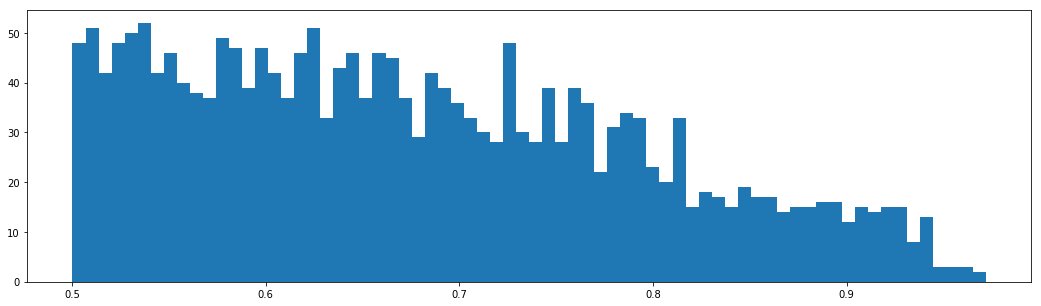

In [93]:
plt.figure(figsize=(18,5))
plt.hist(predictions, bins=70)
plt.show()

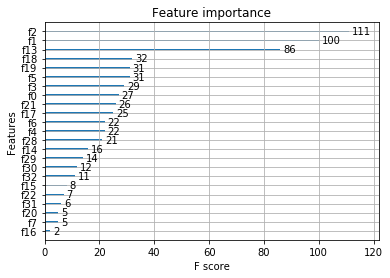

In [107]:
bst = XGBClassifier()
bst.fit(X.values, y.values.reshape(-1))
plot_importance(bst)
plt.show()

In [99]:
X_sub = data[data.in_target.astype(bool)].drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target'], axis=1)
y_sub = data[data.in_target.astype(bool)]['a_win']

In [100]:
xgb = XGBClassifier()
xgb.fit(X.values, y_sub.values.reshape(-1))
preds = xgb.predict_proba(X_sub.values)

sub = cp.deepcopy(y_sub)
sub['Pred'] = preds[:,1]
sub['ID'] = sub['Season'].map(str) + '_' + sub['team_a'].map(str) + '_' + sub['team_b'].map(str)
sub.set_index('ID', inplace=True)
sub.drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target'], axis=1, inplace=True)
sub.head()

XGBoostError: [17:33:59] src/objective/regression_obj.cc:90: Check failed: preds.size() == info.labels.size() (2117 vs. 9112) labels are not correctly providedpreds.size=2117, label.size=9112

Stack trace returned 6 entries:
[bt] (0) 0   libxgboost.dylib                    0x0000000116ad6618 _ZN4dmlc15LogMessageFatalD2Ev + 40
[bt] (1) 1   libxgboost.dylib                    0x0000000116b41085 _ZN7xgboost3obj10RegLossObjINS0_22LogisticClassificationEE11GetGradientERKNSt3__16vectorIfNS4_9allocatorIfEEEERKNS_8MetaInfoEiPNS5_INS_6detail18bst_gpair_internalIfEENS6_ISG_EEEE + 613
[bt] (2) 2   libxgboost.dylib                    0x0000000116ad321d _ZN7xgboost11LearnerImpl13UpdateOneIterEiPNS_7DMatrixE + 445
[bt] (3) 3   libxgboost.dylib                    0x0000000116aeb78f XGBoosterUpdateOneIter + 79
[bt] (4) 4   libffi.dylib                        0x00007fff53603f64 ffi_call_unix64 + 76
[bt] (5) 5   ???                                 0x00007ffee3ac7d90 0x0 + 140732718153104


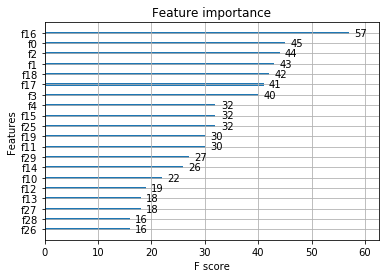

In [553]:
from xgboost import plot_importance

plot_importance(xgb, max_num_features=25)
plt.show()

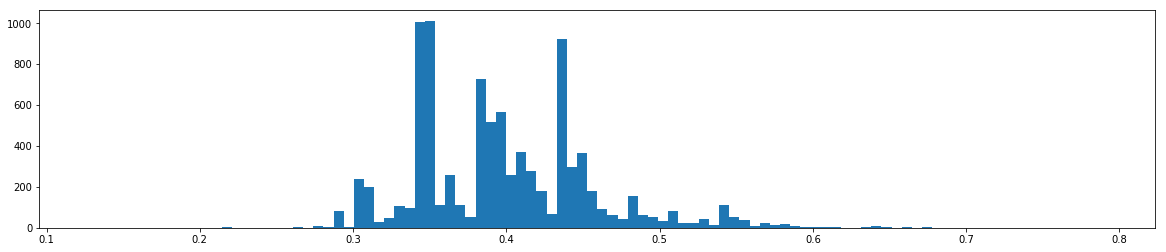

In [554]:
plt.figure(figsize=(20,4))
plt.hist(sub['Pred'], bins=100)
plt.show()

In [555]:
sub.to_csv('submissions/xgb_baseline_1.csv')

In [557]:
sub.shape

(9112, 1)

### Event features

In [67]:
pd.read_csv('data/MasseyOrdinals.csv')

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260
5,2003,35,SEL,1107,249
6,2003,35,SEL,1108,228
7,2003,35,SEL,1110,204
8,2003,35,SEL,1111,183
9,2003,35,SEL,1112,26


### Neural Network